In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
%matplotlib inline

In [6]:
df = pd.read_csv('https://raw.githubusercontent.com/Znarfois/music-streaming-team-kemp/main/merged_charts_tracks_datav3.csv')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73200 entries, 0 to 73199
Data columns (total 35 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   track_id                      73200 non-null  object 
 1   date                          73200 non-null  object 
 2   position                      73200 non-null  int64  
 3   track_name                    73200 non-null  object 
 4   streams                       73200 non-null  int64  
 5   artist_id                     73200 non-null  object 
 6   artist_name                   73200 non-null  object 
 7   album_id                      73200 non-null  object 
 8   duration                      73200 non-null  int64  
 9   release_date                  73200 non-null  object 
 10  popularity                    73200 non-null  int64  
 11  danceability                  73200 non-null  float64
 12  energy                        73200 non-null  float64
 13  k

In [7]:
df['date'] = pd.to_datetime(df['date'])
df.head()

,date,position,track_id,track_name,streams,artist_id,artist_name,album_id,duration,release_date,...,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,is_mainstay,is_Top100,is_viral
0,2019-09-01,1,6IdEQ3HUseBeRUYFSzSMdL,Zebbiana,267548,117XFtbZPnCI1EYKjYZWJc,Skusta Clee,4AaygWd1ZnCzZ4ak9EM23s,304664,07/26/2019,...,1,0.0370,0.5450,0.000000,0.1050,0.498,134.006,1,1,0
1,2019-09-01,2,6v3KW9xbzN5yKLt9YKDYA2,Señorita,259828,7n2wHs1TKAczGzO7Dd2rGr,Shawn Mendes,0xzScN8P3hQAz3BT3YYX5w,190799,06/19/2019,...,0,0.0290,0.0392,0.000000,0.0828,0.749,116.967,1,1,0
2,2019-09-01,3,1dGr1c8CrMLDpV6mPbImSI,Lover,240408,06HL4z0CvFAxyc27GXpf02,Taylor Swift,1NAmidJlEaVgA3MpcPFYGq,221306,08/23/2019,...,1,0.0919,0.4920,0.000016,0.1180,0.453,68.534,0,1,1
3,2019-09-01,4,0gDRtumoR9ZrvAlnniToMz,Ikaw At Ako,236726,0rZRTXEmmPmx6gt92tBqIc,Moira Dela Torre,397zfeJ75BlnjfUEkgtwlG,269876,01/14/2019,...,1,0.0289,0.8870,0.001790,0.3220,0.366,135.525,1,1,0
4,2019-09-01,5,5l9g7py8RCblcvbZgGQgSd,Pagtingin,190049,4DAcJXcjX0zlQAZAPAx4Zb,Ben&Ben,7xCcuTA3abKwxj8HwgxP7R,227370,05/12/2019,...,1,0.0253,0.5060,0.000000,0.4040,0.523,95.049,1,1,0


In [8]:
df.describe()

,position,streams,duration,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,is_mainstay,is_Top100,is_viral
count,73200.0000,73200.000000,73200.000000,73200.000000,73200.000000,73200.00000,73200.00000,73200.000000,73200.000000,73200.000000,73200.000000,73200.000000,73200.00000,73200.000000,73200.000000,73200.000000,73200.000000,73200.000000
mean,100.5000,55187.094180,231657.148634,70.265929,0.624894,0.52873,5.54000,-7.421862,0.779372,0.071105,0.362821,0.004226,0.14868,0.439298,117.082659,0.190000,0.825779,0.160260
std,57.7347,44208.310362,53746.551668,14.924452,0.140069,0.17373,3.49589,2.730869,0.414673,0.074124,0.273063,0.044847,0.10559,0.197342,27.084922,0.392304,0.379302,0.366849
min,1.0000,18324.000000,41866.000000,0.000000,0.184000,0.08240,0.00000,-24.250000,0.000000,0.023200,0.000002,0.000000,0.02150,0.049900,52.572000,0.000000,0.000000,0.000000
25%,50.7500,28465.500000,195186.000000,64.000000,0.523000,0.40300,2.00000,-8.658000,1.000000,0.032400,0.116000,0.000000,0.09020,0.293000,95.390000,0.000000,1.000000,0.000000
50%,100.5000,36579.000000,217946.000000,71.000000,0.638000,0.52900,6.00000,-7.209000,1.000000,0.043800,0.319000,0.000000,0.11000,0.424000,115.053000,0.000000,1.000000,0.000000
75%,150.2500,63725.500000,261426.000000,80.000000,0.721000,0.65300,9.00000,-5.569000,1.000000,0.070500,0.575250,0.000007,0.16900,0.562000,135.525000,0.000000,1.000000,0.000000
max,200.0000,514546.000000,536217.000000,100.000000,0.940000,0.96900,11.00000,-0.995000,1.000000,0.555000,0.978000,0.908000,0.94400,0.973000,207.476000,1.000000,1.000000,1.000000


In [11]:
df.shape

(73200, 25)

In [9]:
df_viral = df[df['is_viral']==1]

In [10]:
df_viral

,date,position,track_id,track_name,streams,artist_id,artist_name,album_id,duration,release_date,...,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,is_mainstay,is_Top100,is_viral
2,2019-09-01,3,1dGr1c8CrMLDpV6mPbImSI,Lover,240408,06HL4z0CvFAxyc27GXpf02,Taylor Swift,1NAmidJlEaVgA3MpcPFYGq,221306,08/23/2019,...,1,0.0919,0.49200,0.000016,0.1180,0.453,68.534,0,1,1
16,2019-09-01,17,6RRNNciQGZEXnqk8SQ9yv5,You Need To Calm Down,124399,06HL4z0CvFAxyc27GXpf02,Taylor Swift,1NAmidJlEaVgA3MpcPFYGq,171360,08/23/2019,...,1,0.0553,0.00929,0.000000,0.0637,0.714,85.026,0,1,1
19,2019-09-01,20,1pNAf6W7POwjOD8x8mWf8G,Nobody Knows,116377,1z7b1Pr1rSlvWRzsW3HOrS,Russ,7CC9iqq2JZ3j4jF9SNNLL7,215555,12/23/2018,...,1,0.4320,0.44500,0.000284,0.1030,0.526,162.043,0,1,1
26,2019-09-01,27,3RauEVgRgj1IuWdJ9fDs70,The Man,106262,06HL4z0CvFAxyc27GXpf02,Taylor Swift,1NAmidJlEaVgA3MpcPFYGq,190360,08/23/2019,...,1,0.0540,0.07670,0.000000,0.0901,0.633,110.048,0,1,1
32,2019-09-01,33,2YpeDb67231RjR0MgVLzsG,Old Town Road - Remix,93060,7jVv8c5Fj3E9VhNjxT4snq,Lil Nas X,4IRiXE5NROxknUSAUSjMoO,157066,06/21/2019,...,1,0.1020,0.05330,0.000000,0.1130,0.639,136.041,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73148,2020-08-31,149,2tR5liucorXRwduxr0qEx6,Binalewala - Original Version,28441,6ZdzYE3CEgY0Umgi3Dsgv8,Michael Dutchi Libranda,1793zMKn7sOceKYWdN7yQX,268486,10/07/2019,...,1,0.0337,0.56900,0.000000,0.0649,0.311,139.516,0,1,1
73163,2020-08-31,164,4YMfE4r1JWADFw2Fn74XW2,Catriona,27114,1SrWbIDP84JcSDr0oTBAQw,Matthaios,6epJqGK57I0W0PMN2kyTso,204512,12/01/2019,...,1,0.0545,0.67000,0.000000,0.1770,0.759,114.858,0,1,1
73176,2020-08-31,177,6wQlQrTY5mVS8EGaFZVwVF,Smile (with The Weeknd),26307,4MCBfE4596Uoi2O4DtmEMz,Juice WRLD,6n9DKpOxwifT5hOXtgLZSL,196180,07/10/2020,...,0,0.1330,0.22400,0.000000,0.1240,0.306,158.831,0,1,1
73183,2020-08-31,184,1NopgVCMVhCKIm64tF7auX,With A Smile,25743,7374lH6kwx9uQATYQ9H3Cp,Eraserheads,1IalzI8USuu4PB679HVV5C,278173,11/01/1994,...,1,0.0334,0.72000,0.000002,0.1750,0.342,149.246,0,1,1


In [33]:
#groupby to remove duplicate entries of the same track_id
df_viral.groupby(['track_id','track_name','artist_name'])[['popularity', 'danceability', 'energy', 'key',
       'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness',
       'liveness', 'valence', 'tempo']].mean()

,,,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo
track_id,track_name,artist_name,,,,,,,,,,,,
011GTFfE8rqTRMhz5g8IAW,Repeat,Al James,58,0.844,0.314,9,-13.434,0,0.3460,0.43400,0.000770,0.0787,0.571,120.039
029B34AzPVXzOQCyaJpkdH,Changes,Lauv,9,0.532,0.455,2,-8.366,1,0.1560,0.45200,0.000000,0.2370,0.204,148.182
03o4HPzUwftpgAPNQSuaBS,This Love Isn't Crazy,Carly Rae Jepsen,62,0.632,0.728,6,-5.759,0,0.0604,0.00308,0.000000,0.2780,0.252,117.981
0BaMZMMEG7GWrUYsoGw8Yg,Neneng B,Nik Makino,61,0.848,0.447,5,-10.560,0,0.0780,0.24000,0.000000,0.0858,0.353,117.959
0G5qmu4TsdUH19zdcbI9Ui,Vibe With Me,Matthaios,69,0.817,0.297,1,-13.695,1,0.0553,0.72200,0.000000,0.1010,0.443,100.031
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7n7mTiptQT1iNa7rMhcZS8,"A Perfect Christmas - Recorded at OnQ Studios, Manila",Tatak Pinoy All-Stars,56,0.358,0.571,4,-7.337,1,0.0288,0.66300,0.000000,0.0935,0.456,183.798
7rrVN7f83kwaz2sGxoFnJY,Christmas in Our Hearts,Jose Mari Chan,58,0.570,0.292,5,-14.408,1,0.0293,0.84100,0.000000,0.1370,0.399,72.534
7szuecWAPwGoV1e5vGu8tl,In Your Eyes,The Weeknd,88,0.667,0.719,7,-5.371,0,0.0346,0.00285,0.000081,0.0736,0.717,100.021


In [34]:
#assign to new df df_viraltracks for EDA
df_viraltracks = df_viral.groupby(['track_id','track_name','artist_name'])[['popularity', 'danceability', 'energy', 'key',
       'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness',
       'liveness', 'valence', 'tempo']].mean()

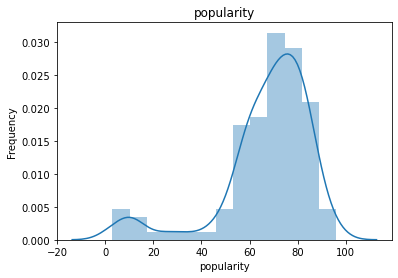

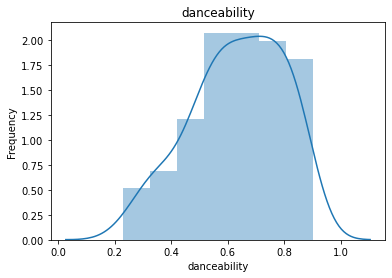

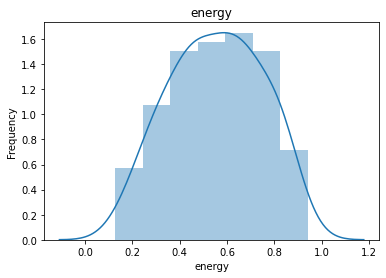

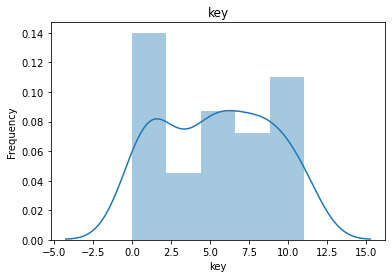

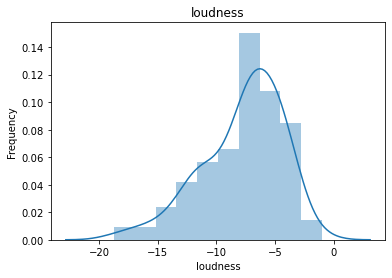

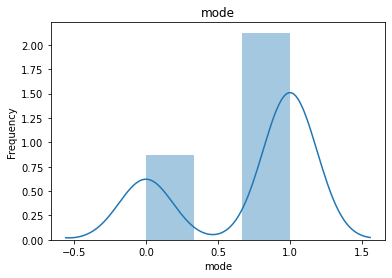

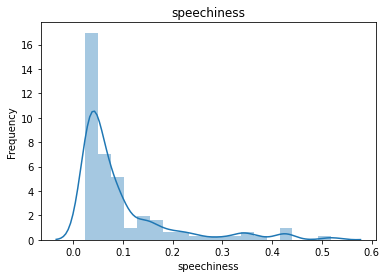

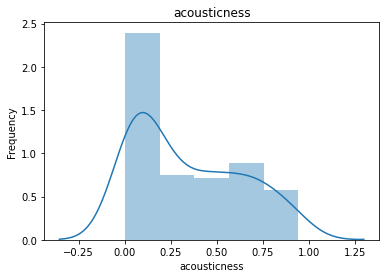

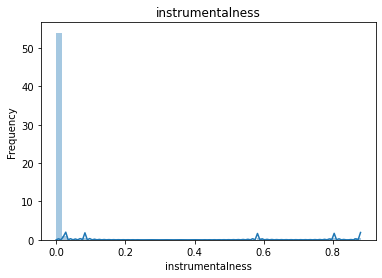

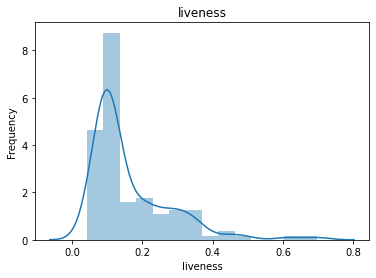

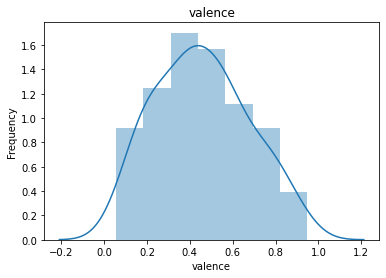

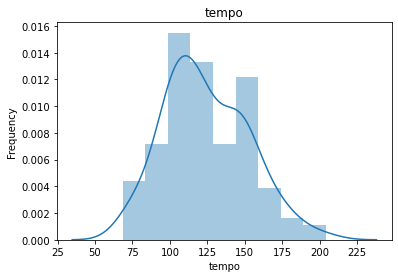

In [36]:
#Viral DataFrame Audio Features Distribution
for col in ['popularity', 'danceability', 'energy', 'key',
       'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness',
       'liveness', 'valence', 'tempo']:
    sns.distplot(df_viraltracks[col], kde=True)
    plt.title(col)
    plt.ylabel('Frequency')
    plt.show()

#Audio Features Observations for df_viraltracks:

popularity = Skewed to the right, obviously most are going to have high popularity being a viral track and in the Top 200. Most are in the 70-90 range. However, what is notable is there are a number of tracks with low popularity which are still considered viral.

danceability = Skewed to the right, mostly 0.5 - 0.9. Viral tracks tend to be more danceable than the usual charting tracks.

energy = Almost normally distributed. Both low and high energy tracks can be viral.

key = Pitch (0 = do, 2 = re, 4 = mi, 5 = fa, 7 = sol, 9 = la, 11 = ti). Well distributed.

loudness = Skewed to the right, closely matches the distribution for all Spotify tracks. Majority seem to be in the -7.5dB range or higher.

mode = (Major = 1; Minor = 0) More tracks are using Major modality.
 
speechiness = (>0.66 = purely spoken words; 0.33 - 0.66 = both music and speech such as rap; <0.33 music and non-speech tracks)
Most values are between 0 - 0.1. 

acousticness = (0 not acoustic; 1 acoustic) Skewed to the left, though while most viral hits are not acoustic, the remaining share of more acoustic songs (>0.12 - 0.9) is more evenly distributed frequency wise.

instrumentalness = (0 has vocals; 0.5 - 1 no vocals) Majority of the tracks have vocals.

liveness = (0 not live ; 0.8 - 1 high chance to be live) Majority of the tracks aren't live and probably taken from the album versions.

valence = (0 sad/angry ; 1 happy/cheerful) Almost normal distribution with peak slightly to the left

tempo = peaks seen from 100-125 and 150-160. Nothing below 75 and not much above 175.

In [ ]:
#Skewness Test for df_viraltracks

In [37]:
from scipy.stats import skew, kurtosis

In [38]:
def skew_type(skewval, skewthres):
    test_skew_value = abs(skewval)-skewthres    
    if (test_skew_value > 0) & (np.sign(skewval)>0):
        return "right-tailed"
    elif  (test_skew_value > 0) & (np.sign(skewval)<0):
        return "left-tailed"
    else:
        return "approximately symmetric"
    


In [39]:
for col in ['popularity', 'danceability', 'energy', 'key',
       'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness',
       'liveness', 'valence', 'tempo']:
    print("Skewness of variable %s : %0.2f (%s)" %(col, skew(df_viraltracks[col]), skew_type(skew(df_viraltracks[col]),0.1)))


Skewness of variable popularity : -1.70 (left-tailed)
Skewness of variable danceability : -0.42 (left-tailed)
Skewness of variable energy : -0.09 (approximately symmetric)
Skewness of variable key : 0.01 (approximately symmetric)
Skewness of variable loudness : -0.82 (left-tailed)
Skewness of variable mode : -0.92 (left-tailed)
Skewness of variable speechiness : 2.27 (right-tailed)
Skewness of variable acousticness : 0.51 (right-tailed)
Skewness of variable instrumentalness : 6.29 (right-tailed)
Skewness of variable liveness : 1.95 (right-tailed)
Skewness of variable valence : 0.21 (right-tailed)
Skewness of variable tempo : 0.38 (right-tailed)


In [ ]:
#Kurtosis Test for df_viraltracks

In [40]:
def kurtosis_type(kurtval, kurtthres):
    test_kurtosis_value = abs(kurtval-kurtthres)
    #in scipy's implementation, 3 is subtracted from the original definition of kurtosis
    
    if (test_kurtosis_value > 0) & (np.sign(kurtval)>0):
        return "heavy-tailed"
    elif  (test_kurtosis_value  > 0) & (np.sign(kurtval)<0):
        return "light-tailed"
    else:
        return "approximately normal"
    


In [41]:
for col in ['popularity', 'danceability', 'energy', 'key',
       'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness',
       'liveness', 'valence', 'tempo']:
    print("Kurtosis of variable %s : %0.2f (%s)" %(col, kurtosis(df_viraltracks[col]), kurtosis_type(kurtosis(df_viraltracks[col]),0.1)))


Kurtosis of variable popularity : 2.99 (heavy-tailed)
Kurtosis of variable danceability : -0.63 (light-tailed)
Kurtosis of variable energy : -0.89 (light-tailed)
Kurtosis of variable key : -1.23 (light-tailed)
Kurtosis of variable loudness : 0.35 (heavy-tailed)
Kurtosis of variable mode : -1.16 (light-tailed)
Kurtosis of variable speechiness : 4.87 (heavy-tailed)
Kurtosis of variable acousticness : -1.08 (light-tailed)
Kurtosis of variable instrumentalness : 38.55 (heavy-tailed)
Kurtosis of variable liveness : 4.49 (heavy-tailed)
Kurtosis of variable valence : -0.75 (light-tailed)
Kurtosis of variable tempo : -0.27 (light-tailed)


df_mainstay Section:

In [12]:
df_mainstay = df[df['is_mainstay']==1]

In [13]:
df_mainstay

,date,position,track_id,track_name,streams,artist_id,artist_name,album_id,duration,release_date,...,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,is_mainstay,is_Top100,is_viral
0,2019-09-01,1,6IdEQ3HUseBeRUYFSzSMdL,Zebbiana,267548,117XFtbZPnCI1EYKjYZWJc,Skusta Clee,4AaygWd1ZnCzZ4ak9EM23s,304664,07/26/2019,...,1,0.0370,0.5450,0.000000,0.1050,0.498,134.006,1,1,0
1,2019-09-01,2,6v3KW9xbzN5yKLt9YKDYA2,Señorita,259828,7n2wHs1TKAczGzO7Dd2rGr,Shawn Mendes,0xzScN8P3hQAz3BT3YYX5w,190799,06/19/2019,...,0,0.0290,0.0392,0.000000,0.0828,0.749,116.967,1,1,0
3,2019-09-01,4,0gDRtumoR9ZrvAlnniToMz,Ikaw At Ako,236726,0rZRTXEmmPmx6gt92tBqIc,Moira Dela Torre,397zfeJ75BlnjfUEkgtwlG,269876,01/14/2019,...,1,0.0289,0.8870,0.001790,0.3220,0.366,135.525,1,1,0
4,2019-09-01,5,5l9g7py8RCblcvbZgGQgSd,Pagtingin,190049,4DAcJXcjX0zlQAZAPAx4Zb,Ben&Ben,7xCcuTA3abKwxj8HwgxP7R,227370,05/12/2019,...,1,0.0253,0.5060,0.000000,0.4040,0.523,95.049,1,1,0
5,2019-09-01,6,34ob61cxp34Sf7KHK6RnSU,Sa Susunod Na Lang,173951,0iqkVK6sTXi7DZWWOeKy8Q,PDL,79UXZq6nXVVBpZgWWxb9Gq,214606,09/26/2018,...,0,0.1200,0.1040,0.000000,0.0899,0.721,84.929,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73145,2020-08-31,146,5UhpceEr5XmbVwyoIUIRnh,Hanggang Kailan - Umuwi Ka Na Baby,28815,1EUmQM6xgUQLUkJVcvSdey,Orange & Lemons,0S0yaR1MiuHfyAZPAtChVc,261866,03/24/2005,...,1,0.0296,0.1160,0.000002,0.2260,0.399,146.433,1,1,0
73147,2020-08-31,148,5f9808hpiCpuNyqqdXmpF2,Buwan,28692,0a4r2EnsevvHCukoJ1xFwJ,juan karlos,2CF1utwLM2yXHMZhwFGVY1,343446,06/22/2018,...,1,0.0400,0.4470,0.000171,0.0902,0.360,126.008,1,1,0
73149,2020-08-31,150,0gDRtumoR9ZrvAlnniToMz,Ikaw At Ako,28428,0rZRTXEmmPmx6gt92tBqIc,Moira Dela Torre,397zfeJ75BlnjfUEkgtwlG,269876,01/14/2019,...,1,0.0289,0.8870,0.001790,0.3220,0.366,135.525,1,1,0
73166,2020-08-31,167,3e9HZxeyfWwjeyPAMmWSSQ,"thank u, next",27009,66CXWjxzNUsdJxJ2JdwvnR,Ariana Grande,2fYhqwDWXjbpjaIJPEfKFw,207320,02/08/2019,...,1,0.0658,0.2290,0.000000,0.1010,0.412,106.966,1,1,0


In [43]:
df_mainstay.groupby(['track_id','track_name','artist_name'])[['popularity', 'danceability', 'energy', 'key',
       'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness',
       'liveness', 'valence', 'tempo']].mean().head(10)

,,,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo
track_id,track_name,artist_name,,,,,,,,,,,,
00mBzIWv5gHOYxwuEJXjOG,Sa Ngalan Ng Pag-Ibig,December Avenue,67,0.518,0.762,7,-3.907,1,0.0305,0.0851,0.000000,0.1480,0.271,155.985
0Eqg0CQ7bK3RQIMPw1A7pl,Malibu Nights,LANY,78,0.559,0.422,11,-11.890,1,0.1950,0.7010,0.000002,0.0853,0.191,74.002
0HZ3OUVrGHxttD2EuHqRm3,The Day You Said Goodnight,Hale,66,0.558,0.553,4,-6.669,1,0.0323,0.4920,0.000000,0.1160,0.251,134.263
0Vmk6Ebk4QBq7r0VAz2a6s,Bakit Ba Ikaw,Michael Pangilinan,64,0.668,0.480,10,-5.469,1,0.0284,0.5490,0.000000,0.1120,0.277,119.903
0gDRtumoR9ZrvAlnniToMz,Ikaw At Ako,Moira Dela Torre,64,0.445,0.355,4,-7.351,1,0.0289,0.8870,0.001790,0.3220,0.366,135.525
0hVXuCcriWRGvwMV1r5Yn9,I Don't Care (with Justin Bieber),Ed Sheeran,79,0.798,0.676,6,-5.041,1,0.0442,0.0902,0.000000,0.0894,0.843,101.956
135ggzbjOogZ75IQ0LQi8r,Ang Huling El Bimbo,Eraserheads,60,0.524,0.503,6,-11.790,1,0.0245,0.1840,0.000000,0.2640,0.436,89.497
1X4l4i472kW5ofFP8Xo0x0,Sana,I Belong to the Zoo,69,0.660,0.373,7,-7.874,1,0.0290,0.7010,0.000000,0.2260,0.348,126.887
1rgnBhdG2JDFTbYkYRZAku,Dance Monkey,Tones And I,70,0.825,0.593,6,-6.401,0,0.0988,0.6880,0.000161,0.1700,0.540,98.078


In [44]:
#assign to new df df_mainstaytracks for EDA
df_mainstaytracks = df_mainstay.groupby(['track_id','track_name','artist_name'])[['popularity', 'danceability', 'energy', 'key',
       'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness',
       'liveness', 'valence', 'tempo']].mean()

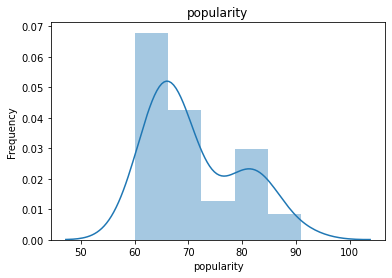

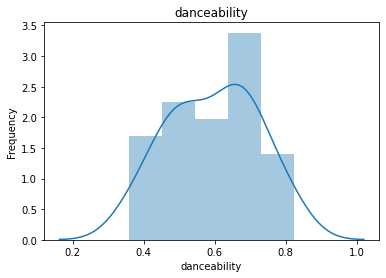

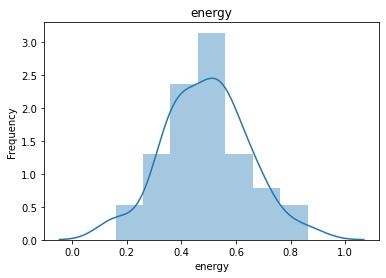

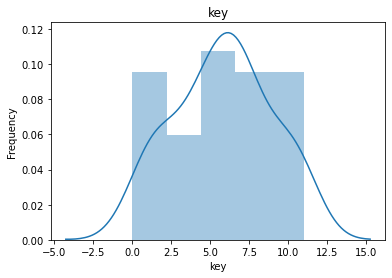

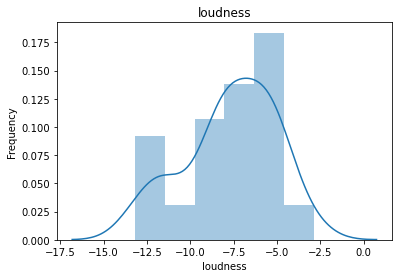

C:\Users\knocom\anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


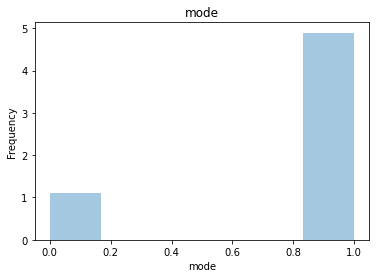

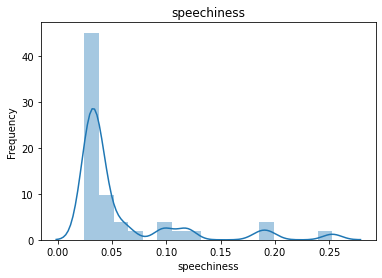

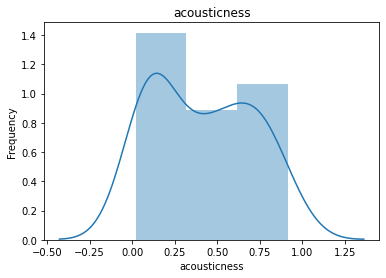

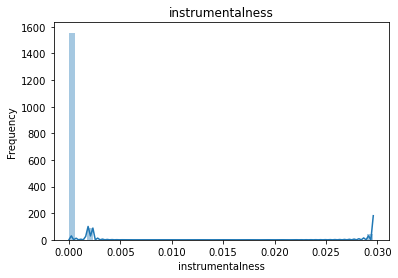

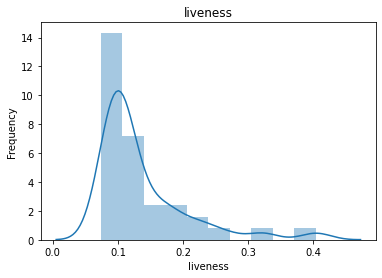

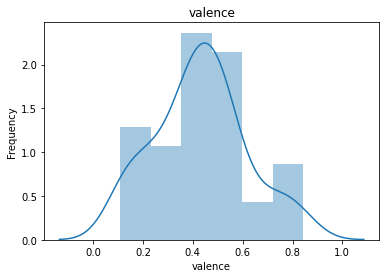

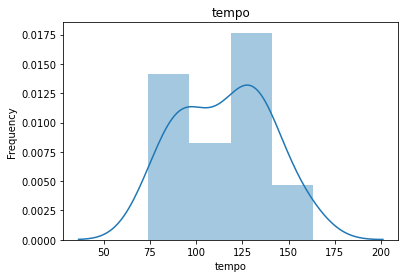

In [45]:
#Mainstay DataFrame Audio Features Distribution
for col in ['popularity', 'danceability', 'energy', 'key',
       'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness',
       'liveness', 'valence', 'tempo']:
    sns.distplot(df_mainstaytracks[col], kde=True)
    plt.title(col)
    plt.ylabel('Frequency')
    plt.show()

#Audio Features Observations for df_mainstaytracks:

popularity = Mainstays are quite centered between the 60-90 range in popularity.

danceability = Almost normally distributed. Range is between 0.36 - 0.82. Peak at 0.7 range. Mainstay tracks tend to be more danceable.

energy = Almost normally distributed. Both low and high energy tracks can be mainstays. Peak is at 0.5.

key = Pitch (0 = do, 2 = re, 4 = mi, 5 = fa, 7 = sol, 9 = la, 11 = ti). Well distributed.

loudness = Skewed to the right, closely matches the distribution for all Spotify tracks. Though there is a notable dip in the -10 dB range.

mode = (Major = 1; Minor = 0) Even more tracks are using Major (1) modality.
 
speechiness = (>0.66 = purely spoken words; 0.33 - 0.66 = both music and speech such as rap; <0.33 music and non-speech tracks)
Most values are between 0 - 0.1. 

acousticness = (0 not acoustic; 1 acoustic) Skewed to the left, but not by much. Songs appear to be varied in terms of acousticness.

instrumentalness = (0 has vocals; 0.5 - 1 no vocals) Majority of the tracks have vocals. In fact, no mainstay track registered a value of above 0.3

liveness = (0 not live ; 0.8 - 1 high chance to be live) Majority of the tracks aren't live and probably taken from the album versions.

valence = (0 sad/angry ; 1 happy/cheerful) Almost normal distribution with peak slightly to the left

tempo = peaks seen from 125 - 140. Nothing below 75 and nothing above 162.

In [ ]:
#Skewness Test for df_mainstaytracks

In [48]:
for col in ['popularity', 'danceability', 'energy', 'key',
       'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness',
       'liveness', 'valence', 'tempo']:
    print("Skewness of variable %s : %0.2f (%s)" %(col, skew(df_mainstaytracks[col]), skew_type(skew(df_mainstaytracks[col]),0.1)))


Skewness of variable popularity : 0.72 (right-tailed)
Skewness of variable danceability : -0.08 (approximately symmetric)
Skewness of variable energy : 0.04 (approximately symmetric)
Skewness of variable key : -0.05 (approximately symmetric)
Skewness of variable loudness : -0.49 (left-tailed)
Skewness of variable mode : -1.63 (left-tailed)
Skewness of variable speechiness : 2.35 (right-tailed)
Skewness of variable acousticness : 0.20 (right-tailed)
Skewness of variable instrumentalness : 5.84 (right-tailed)
Skewness of variable liveness : 2.09 (right-tailed)
Skewness of variable valence : 0.21 (right-tailed)
Skewness of variable tempo : 0.02 (approximately symmetric)


In [ ]:
#Kurtosis Test for df_mainstaytracks

In [49]:
for col in ['popularity', 'danceability', 'energy', 'key',
       'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness',
       'liveness', 'valence', 'tempo']:
    print("Kurtosis of variable %s : %0.2f (%s)" %(col, kurtosis(df_mainstaytracks[col]), kurtosis_type(kurtosis(df_mainstaytracks[col]),0.1)))


Kurtosis of variable popularity : -0.75 (light-tailed)
Kurtosis of variable danceability : -0.92 (light-tailed)
Kurtosis of variable energy : 0.17 (heavy-tailed)
Kurtosis of variable key : -0.85 (light-tailed)
Kurtosis of variable loudness : -0.55 (light-tailed)
Kurtosis of variable mode : 0.65 (heavy-tailed)
Kurtosis of variable speechiness : 4.88 (heavy-tailed)
Kurtosis of variable acousticness : -1.41 (light-tailed)
Kurtosis of variable instrumentalness : 32.38 (heavy-tailed)
Kurtosis of variable liveness : 4.37 (heavy-tailed)
Kurtosis of variable valence : -0.27 (light-tailed)
Kurtosis of variable tempo : -1.00 (light-tailed)


df_BenandBen Section:

In [51]:
df_BenandBen = df[df['artist_name']=='Ben&Ben']

In [52]:
df_BenandBen

,date,position,track_id,track_name,streams,artist_id,artist_name,album_id,duration,release_date,...,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,is_mainstay,is_Top100,is_viral
4,2019-09-01,5,5l9g7py8RCblcvbZgGQgSd,Pagtingin,190049,4DAcJXcjX0zlQAZAPAx4Zb,Ben&Ben,7xCcuTA3abKwxj8HwgxP7R,227370,05/12/2019,...,1,0.0253,0.506,0.000000,0.4040,0.523,95.049,1,1,0
13,2019-09-01,14,1yDiru08Q6omDOGkZMPnei,Maybe The Night,132927,4DAcJXcjX0zlQAZAPAx4Zb,Ben&Ben,6LhZ3QMHGJeTes9cCTxK8e,217197,10/27/2017,...,1,0.0367,0.113,0.000049,0.1140,0.498,74.050,1,1,0
21,2019-09-01,22,3WUEs51GpcvlgU7lehLgLh,Kathang Isip,112781,4DAcJXcjX0zlQAZAPAx4Zb,Ben&Ben,4nQxblVnnFPehg9ujzdJ8L,318814,06/23/2017,...,1,0.0301,0.776,0.000005,0.1520,0.295,126.921,1,1,0
97,2019-09-01,98,6wdCelHrPh7UfliNjwRTUv,Leaves,37752,4DAcJXcjX0zlQAZAPAx4Zb,Ben&Ben,5Yl1Bi501CuE72jaVK4e3y,310708,03/31/2017,...,1,0.0372,0.913,0.000000,0.0891,0.205,118.313,1,1,0
204,2019-09-02,5,5l9g7py8RCblcvbZgGQgSd,Pagtingin,194044,4DAcJXcjX0zlQAZAPAx4Zb,Ben&Ben,7xCcuTA3abKwxj8HwgxP7R,227370,05/12/2019,...,1,0.0253,0.506,0.000000,0.4040,0.523,95.049,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73039,2020-08-31,40,5l9g7py8RCblcvbZgGQgSd,Pagtingin,70173,4DAcJXcjX0zlQAZAPAx4Zb,Ben&Ben,7xCcuTA3abKwxj8HwgxP7R,227370,05/12/2019,...,1,0.0253,0.506,0.000000,0.4040,0.523,95.049,1,1,0
73053,2020-08-31,54,6wdCelHrPh7UfliNjwRTUv,Leaves,57175,4DAcJXcjX0zlQAZAPAx4Zb,Ben&Ben,5Yl1Bi501CuE72jaVK4e3y,310708,03/31/2017,...,1,0.0372,0.913,0.000000,0.0891,0.205,118.313,1,1,0
73064,2020-08-31,65,3X9c4tBzSdGhlO4Fx3WYgW,Lifetime,51330,4DAcJXcjX0zlQAZAPAx4Zb,Ben&Ben,277CpjwmcdLZsHwXpj9D8H,171527,06/04/2020,...,1,0.0316,0.292,0.000010,0.3930,0.401,179.998,0,1,0
73073,2020-08-31,74,4rG3h1QwgjSSWz8EIjCFrm,Araw-Araw,45518,4DAcJXcjX0zlQAZAPAx4Zb,Ben&Ben,7xCcuTA3abKwxj8HwgxP7R,313951,05/12/2019,...,1,0.0295,0.582,0.000000,0.2340,0.224,140.903,0,1,0


In [53]:
df_BenandBen.groupby(['track_id','track_name','artist_name'])[['popularity', 'danceability', 'energy', 'key',
       'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness',
       'liveness', 'valence', 'tempo']].mean()

,,,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo
track_id,track_name,artist_name,,,,,,,,,,,,
0luyrm1L6gjtoLekHOf67t,Masyado Pang Maaga,Ben&Ben,65,0.526,0.571,7,-7.091,1,0.0295,0.458,0.000000,0.1100,0.310,140.051
1EEsKj8lQKZwaFXJ5GFsdk,War,Ben&Ben,57,0.652,0.266,7,-11.453,1,0.0264,0.874,0.005230,0.0974,0.280,92.993
1PUWUlqe6m5HqX754lN3Bs,Mitsa (Salamat),Ben&Ben,57,0.425,0.658,9,-6.739,1,0.0349,0.355,0.000002,0.0836,0.293,122.366
1fXHTDYsJiFOjVWITaFp1j,Ride Home,Ben&Ben,61,0.613,0.551,4,-8.790,1,0.0332,0.235,0.000672,0.1750,0.432,114.110
1yDiru08Q6omDOGkZMPnei,Maybe The Night,Ben&Ben,71,0.572,0.522,2,-9.095,1,0.0367,0.113,0.000049,0.1140,0.498,74.050
2Mo4pOpCYXOu33856sMQLh,Make It With You,Ben&Ben,71,0.558,0.458,4,-10.711,1,0.0485,0.700,0.000021,0.1860,0.342,86.877
37WFUZgkjJKLaISRcX0269,Doors,Ben&Ben,61,0.659,0.392,1,-6.735,1,0.0249,0.159,0.000000,0.0953,0.505,74.979
3PgjBOoA5OytNGkglObpOd,Sa Susunod na Habang Buhay,Ben&Ben,71,0.311,0.342,2,-8.889,1,0.0320,0.432,0.000002,0.1140,0.274,177.158
3WUEs51GpcvlgU7lehLgLh,Kathang Isip,Ben&Ben,71,0.491,0.314,10,-8.580,1,0.0301,0.776,0.000005,0.1520,0.295,126.921


In [58]:
#assign to new df df_viraltracks for EDA
df_BenandBentracks = df_BenandBen.groupby(['track_id','track_name','artist_name'])[['popularity', 'danceability', 'energy', 'key',
       'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness',
       'liveness', 'valence', 'tempo']].mean()

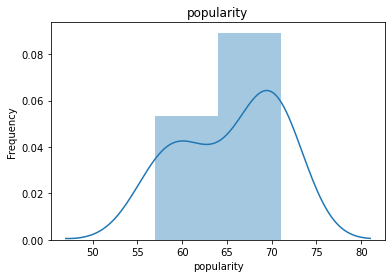

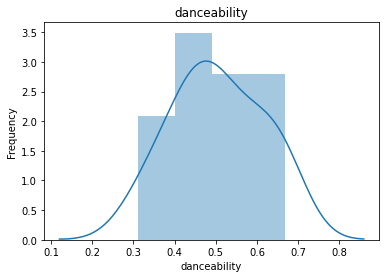

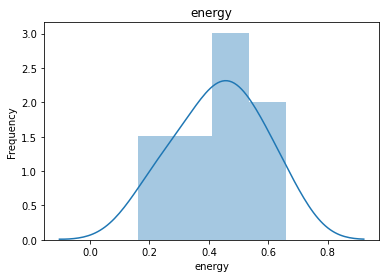

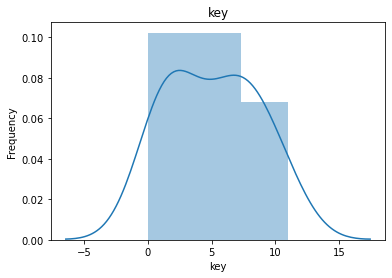

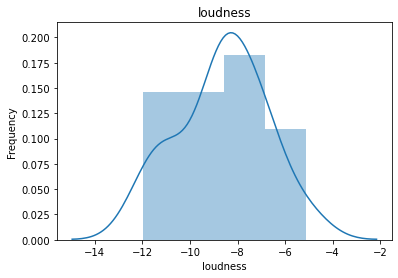

C:\Users\knocom\anaconda3\lib\site-packages\seaborn\distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)


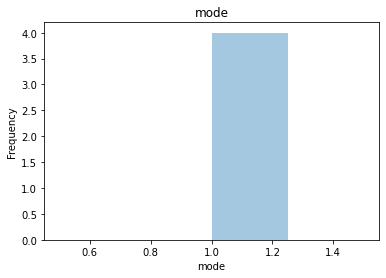

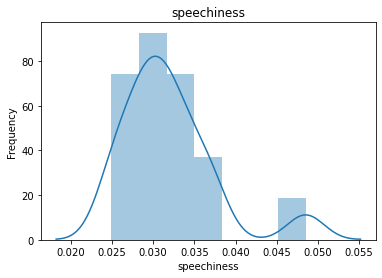

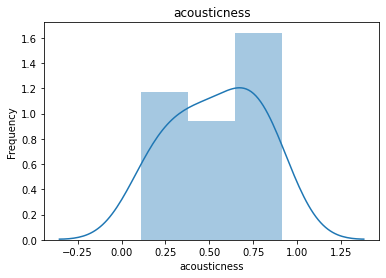

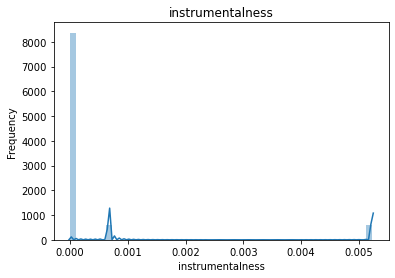

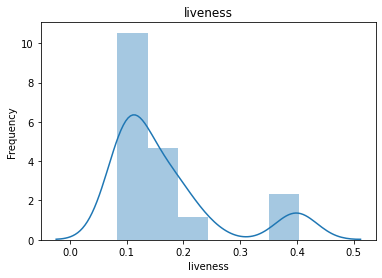

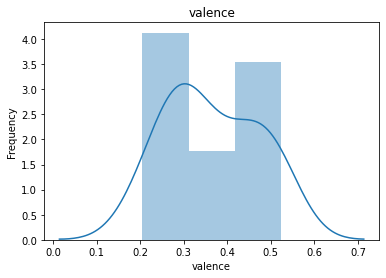

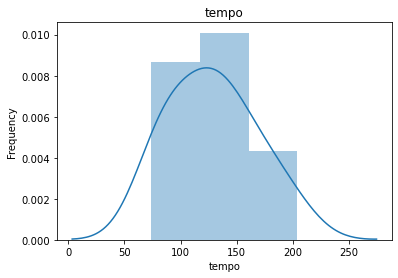

In [59]:
#Viral DataFrame Audio Features Distribution
for col in ['popularity', 'danceability', 'energy', 'key',
       'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness',
       'liveness', 'valence', 'tempo']:
    sns.distplot(df_BenandBentracks[col], kde=True)
    plt.title(col)
    plt.ylabel('Frequency')
    plt.show()

#Audio Features Observations for df_BenandBentracks:

popularity = Ben & Ben songs are skewed to the right and are popular. Their tracks fall between the 57-71 range.

danceability = Almost normally distributed. Good mix in terms of danceability given the range of 0.31 - 0.67.

energy = Slightly skewed to the right. Ben&Ben has more above average energy tracks, but nothing too high.

key = Pitch (0 = do, 2 = re, 4 = mi, 5 = fa, 7 = sol, 9 = la, 11 = ti). Well distributed.

loudness = Slightly skewed to the right, though it is almost evenly distributed.

mode = All tracks are using 1 (Major) modality.
 
speechiness = (>0.66 = purely spoken words; 0.33 - 0.66 = both music and speech such as rap; <0.33 music and non-speech tracks)
Most values are around the 0.3 mark, which means most of their music are still focused on instruments but there appears to be a song with a higher value of 0.485. (Make It With You)

acousticness = (0 not acoustic; 1 acoustic) Skewed to the right, they have more tracks that are more acoustic sounding.

instrumentalness = (0 has vocals; 0.5 - 1 no vocals) All of the tracks have vocals as there's nothing that registered above 0.005 in insturmentalness.

liveness = (0 not live ; 0.8 - 1 high chance to be live) Majority of the tracks aren't live and probably taken from the album versions. One track registered 0.39 in liveness (Lifetime - the sounds of the starting few seconds is similar to that of a live track) Another registered 0.4 in liveness (Pagtingin, though i'm not sure why)

valence = (0 sad/angry ; 1 happy/cheerful) Slightly skewed to the left. Majority of the songs are within 0.5 valence and below which means more of their songs can be considered sadder.

tempo = majority within 75-150 range.

In [60]:
#Skewness Test for df_BenandBentracks
for col in ['popularity', 'danceability', 'energy', 'key',
       'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness',
       'liveness', 'valence', 'tempo']:
    print("Skewness of variable %s : %0.2f (%s)" %(col, skew(df_BenandBentracks[col]), skew_type(skew(df_BenandBentracks[col]),0.1)))


Skewness of variable popularity : -0.40 (left-tailed)
Skewness of variable danceability : -0.00 (approximately symmetric)
Skewness of variable energy : -0.18 (left-tailed)
Skewness of variable key : 0.14 (right-tailed)
Skewness of variable loudness : -0.16 (left-tailed)
Skewness of variable mode : 0.00 (approximately symmetric)
Skewness of variable speechiness : 1.44 (right-tailed)
Skewness of variable acousticness : -0.18 (left-tailed)
Skewness of variable instrumentalness : 3.52 (right-tailed)
Skewness of variable liveness : 1.57 (right-tailed)
Skewness of variable valence : 0.16 (right-tailed)
Skewness of variable tempo : 0.30 (right-tailed)


In [61]:
#Kurtosis Test for df_BenandBentracks
for col in ['popularity', 'danceability', 'energy', 'key',
       'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness',
       'liveness', 'valence', 'tempo']:
    print("Kurtosis of variable %s : %0.2f (%s)" %(col, kurtosis(df_BenandBentracks[col]), kurtosis_type(kurtosis(df_BenandBentracks[col]),0.1)))


Kurtosis of variable popularity : -1.47 (light-tailed)
Kurtosis of variable danceability : -0.98 (light-tailed)
Kurtosis of variable energy : -0.76 (light-tailed)
Kurtosis of variable key : -1.29 (light-tailed)
Kurtosis of variable loudness : -0.60 (light-tailed)
Kurtosis of variable mode : -3.00 (light-tailed)
Kurtosis of variable speechiness : 2.37 (heavy-tailed)
Kurtosis of variable acousticness : -1.20 (light-tailed)
Kurtosis of variable instrumentalness : 10.62 (heavy-tailed)
Kurtosis of variable liveness : 1.27 (heavy-tailed)
Kurtosis of variable valence : -1.31 (light-tailed)
Kurtosis of variable tempo : -0.82 (light-tailed)
